# 📍 Recipe: xG per Player in a Single Match

In this example, we'll load event data for a match from StatsBomb's open dataset, filter for shots, and calculate each player's total expected goals (xG).

We'll then visualize the result using matplotlib.

## 🧰 What You'll Learn

- How to load a StatsBomb match file using `Flow.statsbomb.from_github_file`
- How to filter and summarize data with `.filter()` and `.group_by().summary()`
- How to convert the output to a pandas DataFrame for plotting

## Imports

In [1]:
from penaltyblog.matchflow import Flow, where_equals
import matplotlib.pyplot as plt

## Load the Data

In [2]:
# Load events for a StatsBomb match
match_id = 22912  # Champions League Final 2018/2019

flow = Flow.statsbomb.events(match_id)

/Users/martin/repos/penaltyblog/venv/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


## Calculate xG by player

In [3]:
xg_summary = (
    flow
    .filter(where_equals("type.name", "Shot"))
    .select("team.name", "player.name", "shot.statsbomb_xg")
    .rename(**{"player.name": "player", "team.name": "team", "shot.statsbomb_xg": "xg"})
    .group_by("team", "player")
    .summary(xg=("xg", "sum"))
    .sort("xg", reverse=True)
    .assign(xg=lambda r: round(r["xg"], 2))
    .collect()
)

for row in xg_summary[:5]:
    print(row)

{'team': 'Liverpool', 'player': 'Mohamed Salah', 'xg': np.float64(0.94)}
{'team': 'Tottenham Hotspur', 'player': 'Bamidele Alli', 'xg': np.float64(0.34)}
{'team': 'Tottenham Hotspur', 'player': 'Lucas Rodrigues Moura da Silva', 'xg': np.float64(0.2)}
{'team': 'Tottenham Hotspur', 'player': 'Heung-Min Son', 'xg': np.float64(0.12)}
{'team': 'Liverpool', 'player': 'Divock Okoth Origi', 'xg': np.float64(0.08)}


## Plot as Bar Chart

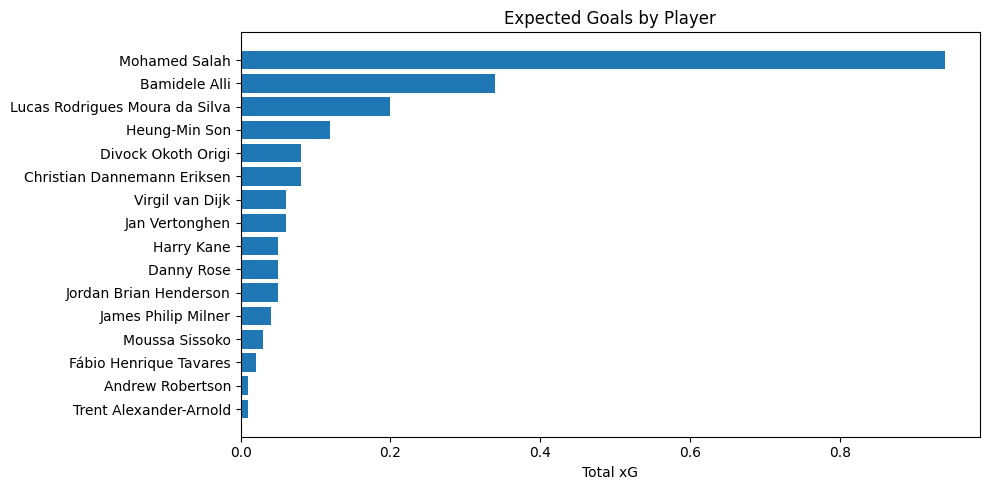

In [4]:
players = [x["player"] for x in xg_summary]
xg = [x["xg"] for x in xg_summary]

plt.figure(figsize=(10, 5))
plt.barh(players, xg)
plt.xlabel("Total xG")
plt.title("Expected Goals by Player")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()